<a href="https://colab.research.google.com/github/Varshitha513/Basic-Task-2/blob/main/dogs_vs_cats_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Preparing** **the** **dataset**

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:04<00:00, 252MB/s]
100% 1.06G/1.06G [00:04<00:00, 245MB/s]


**Organising** **the** **dataset**

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Importing** **necessary** **libraries**

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


**Building the** **CNN model**

In [6]:
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Image Processing**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


**Training the model**

In [8]:
history=model.fit(training_set, epochs=25, validation_data=test_set)


Epoch 1/25
625/625 [==============================] - 158s 251ms/step - loss: 0.6072 - accuracy: 0.6596 - val_loss: 0.5289 - val_accuracy: 0.7392
Epoch 2/25
625/625 [==============================] - 156s 250ms/step - loss: 0.5207 - accuracy: 0.7399 - val_loss: 0.5258 - val_accuracy: 0.7390
Epoch 3/25
625/625 [==============================] - 147s 235ms/step - loss: 0.4783 - accuracy: 0.7694 - val_loss: 0.4453 - val_accuracy: 0.7980
Epoch 4/25
625/625 [==============================] - 145s 232ms/step - loss: 0.4549 - accuracy: 0.7843 - val_loss: 0.4432 - val_accuracy: 0.7942
Epoch 5/25
625/625 [==============================] - 157s 250ms/step - loss: 0.4243 - accuracy: 0.7998 - val_loss: 0.4532 - val_accuracy: 0.7884
Epoch 6/25
625/625 [==============================] - 156s 250ms/step - loss: 0.4053 - accuracy: 0.8120 - val_loss: 0.3975 - val_accuracy: 0.8160
Epoch 7/25
625/625 [==============================] - 156s 250ms/step - loss: 0.3885 - accuracy: 0.8232 - val_loss: 0.3827 -

**Plotting the training history**

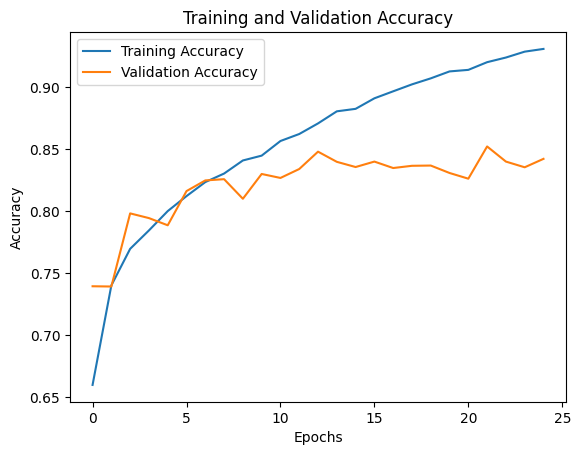

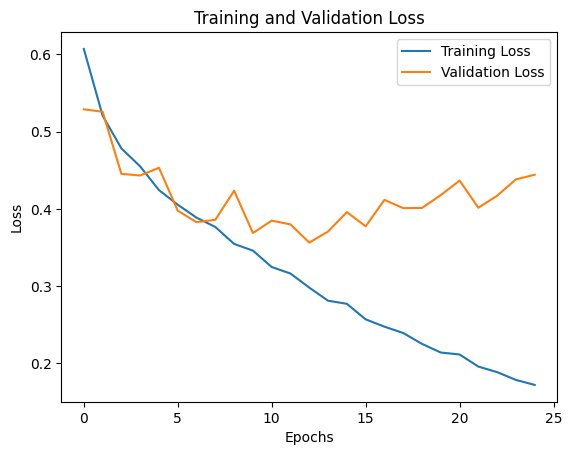

In [9]:
import matplotlib.pyplot as plt

# Training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Making the predictions**

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
test_image = image.load_img('/content/dog.jpg', target_size=(64, 64))

# Convert the image to a numpy array
test_image = image.img_to_array(test_image)

# Expand the dimensions to match the model's input shape
test_image = np.expand_dims(test_image, axis=0)

# Normalize the image if your model was trained with normalized data
# test_image = test_image / 255.0  # Uncomment this line if your model requires normalization

# Make a prediction
result = model.predict(test_image)

# Display the raw prediction values
print("Raw Prediction Values:", result)
if(result==1):
  print("the image is dog")
elif(result==0):
  print("the image is cat")



1/1 [==============================] - 0s 104ms/step
Raw Prediction Values: [[1.]]
the image is dog


In [12]:
# Load the image
test_image = image.load_img('/content/cat.jpg', target_size=(64, 64))

# Convert the image to a numpy array
test_image = image.img_to_array(test_image)

# Expand the dimensions to match the model's input shape
test_image = np.expand_dims(test_image, axis=0)

# Normalize the image if your model was trained with normalized data
# test_image = test_image / 255.0  # Uncomment this line if your model requires normalization

# Make a prediction
result = model.predict(test_image)

# Display the raw prediction values
print("Raw Prediction Values:", result)
if(result==1):
  print("the image is dog")
elif(result==0):
  print("the image is cat")



1/1 [==============================] - 0s 21ms/step
Raw Prediction Values: [[0.]]
the image is cat
